In [ ]:
import subprocess

subprocess.run(["python", "-m", "run_parallel_experiments"])

In [2]:
from IPython.display import Markdown, display
from wand.image import Image as WImage
import matplotlib.pyplot as plt
import json
from stats_visualizer import StatsVisualizer
import os
from glob import glob

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

def printmd(string):
    display(Markdown(string))


warehouse_2_4.pdf

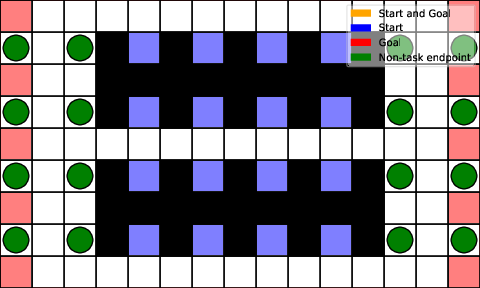

den101d.pdf

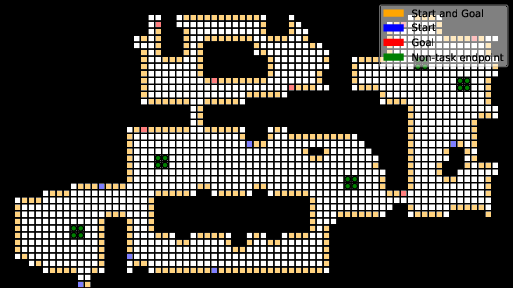

warehouse_10_10.pdf

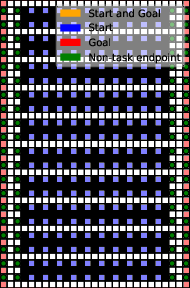

input_warehouse_mid.pdf

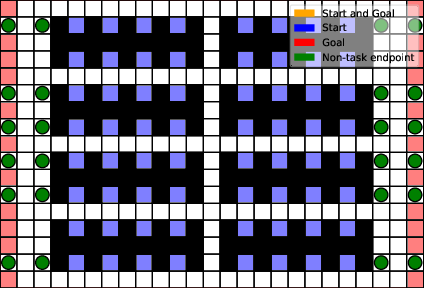

warehouse_15_15.pdf

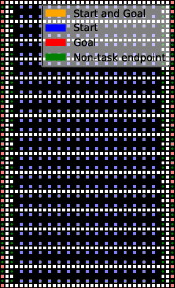

den009d.pdf

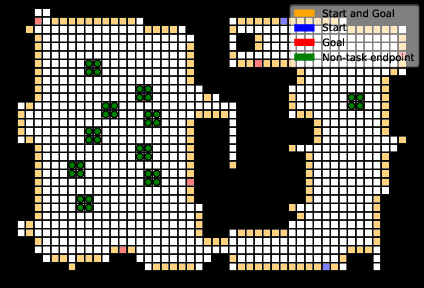

den202d.pdf

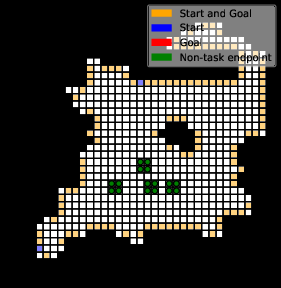

input_warehouse_big_with_middle_corridors.pdf

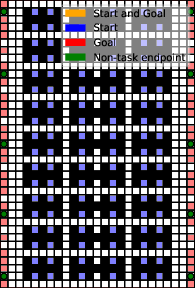

input_warehouse_mid_with_middle_corridors.pdf

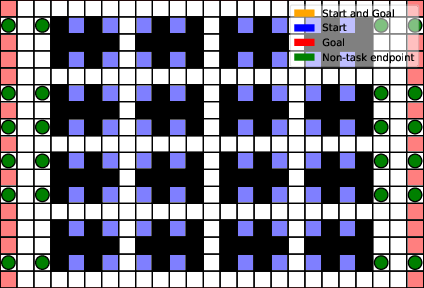

warehouse_20_20.pdf

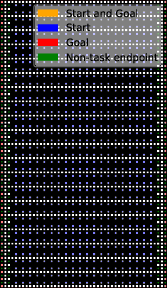

warehouse_3_3.pdf

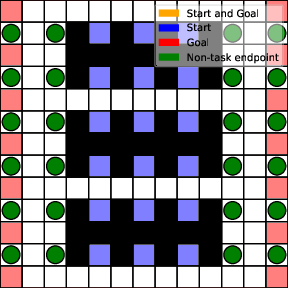

den312d.pdf

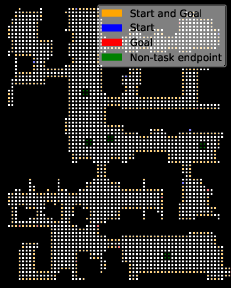

input_warehouse_small.pdf

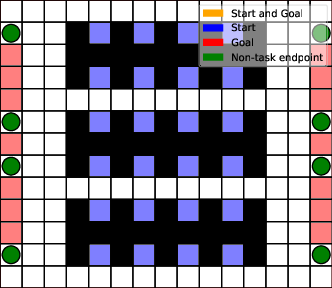

arena.pdf

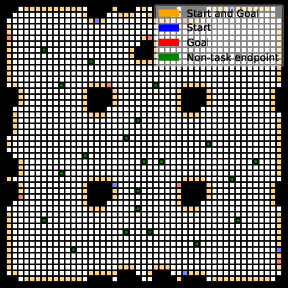

input_warehouse_big.pdf

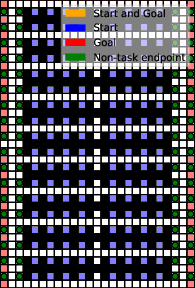

input_warehouse_small_with_middle_corridor.pdf

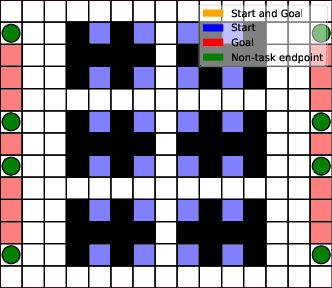

In [2]:
# Display map images

for image_path in glob(os.path.join('../maps_pdfs', '*.pdf')):
    printmd(image_path.split('/')[-1])
    display(WImage(filename=image_path))

In [3]:
result_file_names = glob(os.path.join('ResultsJsons', '*.json'))

for result_file_name in result_file_names:
    with open(result_file_name, "r") as f:
        results = json.load(f)
    maps = results["maps"]

    possible_number_of_tasks = results["tasks_num"]
    possible_number_of_task_freq = results["tasks_frequency"]
    possible_number_of_td_updates = results["task_distr_update_num"]

    result_file_name = str(result_file_name.split('/')[-1]).split('.')[0]

    printmd(f"## Saving plots for file: {result_file_name} ...")

    stats_visualizer = StatsVisualizer(maps, possible_number_of_tasks, possible_number_of_task_freq, possible_number_of_td_updates, save=True)

    stats_visualizer.show_all_metrics()

printmd("Finished.")

## Saving plots for file: results_11_09_2024__08_53_09 ...

## Saving plots for file: results_12_09_2024__00_05_04 ...

## Saving plots for file: results_11_09_2024__10_25_34 ...

## Saving plots for file: results_11_09_2024__09_30_52 ...

## Saving plots for file: results_11_09_2024__07_09_09 ...

## Saving plots for file: results_11_09_2024__06_28_36 ...

Finished.